# LIBRARY
----------------------------
Get the libary for #mlzoomcamp training midterm project.

In [1]:
import pandas as pd
import numpy as np
 
import seaborn as sns
from matplotlib import pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier


from IPython.display import display

import xgboost as xgb

# DATASET
--------------
## Data Description
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to confirm whether potential bank clients will subscribe to the term deposit or not ('yes' or 'no' condition).
## Objectives
The classification goal is to predict the probability whether the client will subscribe to a term deposit or not (variable y = yes/no).

## Data preparation
--------------
Features Information:

| No. | Feature      | Type | Information     |
| --- | --- | --- | --- |
| 1   | age   | Numeric   | 0-... |
| 2   | job (Job Type) | Categorical  | admin, bluecollar, entrepreneur, housemaid, management, retired, selfemployed, services, student, technician, unemployed, unknown  |
| 3   | marital (Marital Status)  | Categorical | divorced, married, single, unknown; note: 'divorced' means divorced or widowed |
| 4   |  education | Categorical  | basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown  |
| 5   |  default (Has credit in default?)  | Categorical   | no, yes, unknown   |
| 6   |  balance (Average yearly balance), in euros  | numeric | 0-...  |
| 7   |  housing (Has housing loan?)   | Categorical   |  no, yes, unknown   |
| 8   |  loan (Has Personal loan?)  |  Categorical  |  no, yes, unknown   |
| 9   |  contact (Contact communication type)  | Categorical   | cellular, telephone |
| 10  |  day (Last contact day of the month)  | Numerical   | 1-31  |
| 11  |  month (Last contact month of year) | Categorical  | jan, feb, mar, apr, may, jun, jul, aug, sep, okt, nov, dec  |
| 12  | duration (Last contact duration)  | Numeric  | Seconds|
| 13  | campaign (Number of contacts performed during this campaign and for this client) | Numeric  | 0-... (Includes last contact) |
| 14  |  pdays (Number of days that passed by after the client was last contacted from a previous campaign) | Numeric  | 0-999 (999 means client was not previously contacted) |
| 15  |  previous (Number of contacts performed before this campaign and for this client) | Numeric | 0-...  |
| 16  |  poutcome (Outcome of the previous marketing campaign) |  Categorical | failure, nonexistent, success |
| 17  |  Target (has the client subscribed a term deposit?) | Categorical  | yes, no |


In [2]:
df = pd.read_csv('bank-full.csv')
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 17)

The features used in this midterm project are:
+ `'age'`,
+ `'marital'`, 
+ `'job'`, 
+ `'default'`,
+ `'balance'`,
+ `'housing'`,
+ `'loan'`,
+ `'campaign'`, 
+ `'previous'`, 
+ `'Target'`

In [4]:
used_cols = ['age', 'marital', 'job', 'default', 'balance', 'housing',
             'loan', 'campaign', 'previous', 'Target'
            ]

In [108]:
df_proj = df[used_cols].copy()
df_proj.head(10)

,age,marital,job,default,balance,housing,loan,campaign,previous,Target
0,58,married,management,no,2143,yes,no,1,0,no
1,44,single,technician,no,29,yes,no,1,0,no
2,33,married,entrepreneur,no,2,yes,yes,1,0,no
3,47,married,blue-collar,no,1506,yes,no,1,0,no
4,33,single,unknown,no,1,no,no,1,0,no
5,35,married,management,no,231,yes,no,1,0,no
6,28,single,management,no,447,yes,yes,1,0,no
7,42,divorced,entrepreneur,yes,2,yes,no,1,0,no
8,58,married,retired,no,121,yes,no,1,0,no
9,43,single,technician,no,593,yes,no,1,0,no


In [6]:
df_proj.shape

(45211, 10)

## EDA
--------------------------
What I do in this part:
+ Check data information
+ Check missing value from the data
+ Change the `'Target'` feature into binary
+ Look at numerical and categorical features
+ Check unique values in categorical features
+ Visualize numerical features

### Data info

In [7]:
df_proj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       45211 non-null  int64 
 1   marital   45211 non-null  object
 2   job       45211 non-null  object
 3   default   45211 non-null  object
 4   balance   45211 non-null  int64 
 5   housing   45211 non-null  object
 6   loan      45211 non-null  object
 7   campaign  45211 non-null  int64 
 8   previous  45211 non-null  int64 
 9   Target    45211 non-null  object
dtypes: int64(4), object(6)
memory usage: 3.4+ MB


### Check missing value

In [8]:
df_proj.isna().sum()

age         0
marital     0
job         0
default     0
balance     0
housing     0
loan        0
campaign    0
previous    0
Target      0
dtype: int64

### Change `'Target'` feature into binary

In [109]:
df_proj['target_cat'] = (df_proj.Target == 'yes').astype(int)
del df_proj['Target']

df_proj.head(3)

,age,marital,job,default,balance,housing,loan,campaign,previous,target_cat
0,58,married,management,no,2143,yes,no,1,0,0
1,44,single,technician,no,29,yes,no,1,0,0
2,33,married,entrepreneur,no,2,yes,yes,1,0,0


### Numerical and Categorical Features

In [10]:
numerical = ['age', 'balance', 'campaign', 'previous']
categorical = ['marital', 'job', 'default', 'housing', 'loan'] 

### Check unique value in categorical features

In [11]:
df_proj[categorical].nunique()

marital     3
job        12
default     2
housing     2
loan        2
dtype: int64

### Visualize numerical features

C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_416/3088305826.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df_proj.hist(bins=100, ax=ax, layout=(2, 2),
C:\Users\Aditya Rafi\anaconda3\envs\myenv\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


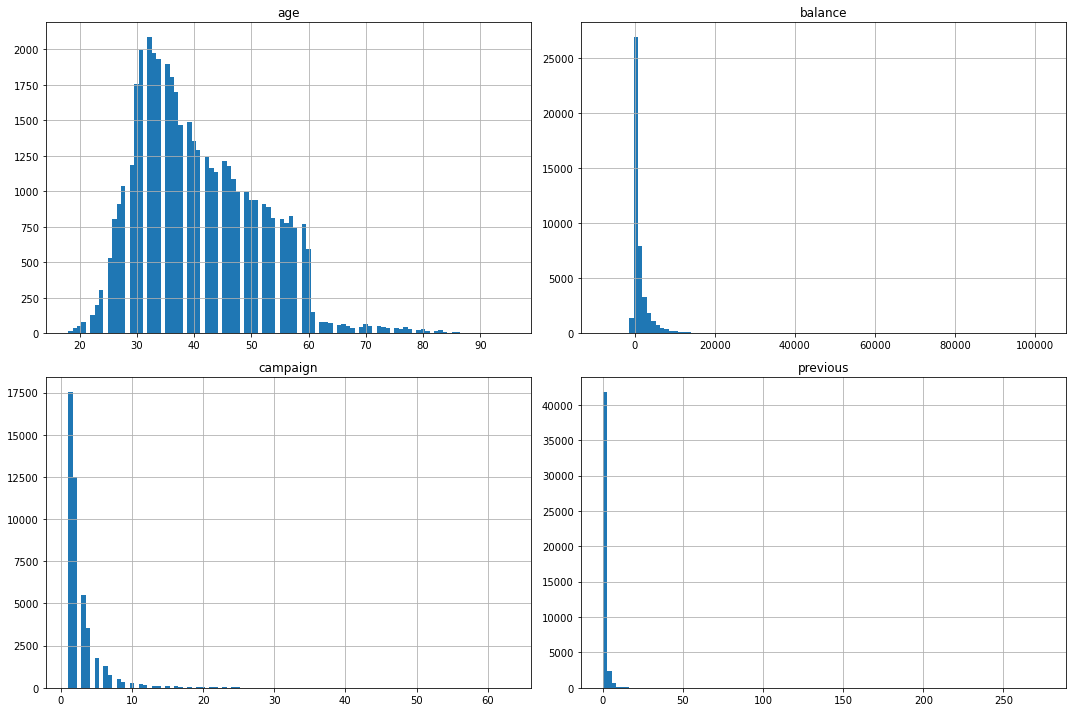

In [12]:
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
df_proj.hist(bins=100, ax=ax, layout=(2, 2), 
             column=numerical)
plt.tight_layout()
plt.show()

## Split Dataset Train/Val/Test (60%/20%/20%)
----------

In [110]:
#80% Full Train, 20% Test
df_full_train, df_test = train_test_split(df_proj, test_size=0.2, random_state=15)
#60% Train, 20% Val (25% from Full Train -> 20%/80%)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=15)

y_train = df_train.target_cat.values
y_val = df_val.target_cat.values
y_test = df_test.target_cat.values

del df_train['target_cat']
del df_val['target_cat']
del df_test['target_cat']

In [111]:
print('Train Full:', len(df_full_train), 
      '(', round((len(df_full_train)/len(df_proj))*100, 2), '%)') 
print('Train:', len(df_train), 
      '(', round((len(df_train)/len(df_proj))*100, 2), '%)') 
print('Validation:', len(df_val), 
      '(', round((len(df_val)/len(df_proj))*100, 2), '%)') 
print('Test:', len(df_test), 
      '(', round((len(df_test)/len(df_proj))*100, 2), '%)') 

Train Full: 36168 ( 80.0 %)
Train: 27126 ( 60.0 %)
Validation: 9042 ( 20.0 %)
Test: 9043 ( 20.0 %)


## Features Importances
---------------------
What I do in this part:
+ View Mutual Info Score for Categorical Features of full train data
+ Use Correlation Matrix to see correlation between features full train data and visualize it using heatmap
+ Check feature importances of Numerical features in train data using AUC score

### Mutual Info Score

In [15]:
def mutual_info_target_score(series):
    return mutual_info_score(series, df_full_train.target_cat)

In [16]:
mi_scores = df_full_train[categorical].apply(mutual_info_target_score)
mi_scores.sort_values(ascending=False).round(4).to_frame(name='Mutual Info')

,Mutual Info
housing,0.0089
job,0.0083
loan,0.0028
marital,0.0023
default,0.0004


From the mutual info score result, I got information that from the five categorical features, the `'housing'` feature or information on whether the prospective customer has a housing loan or not is the most important feature.

### Correlation Matrix with Heatmap

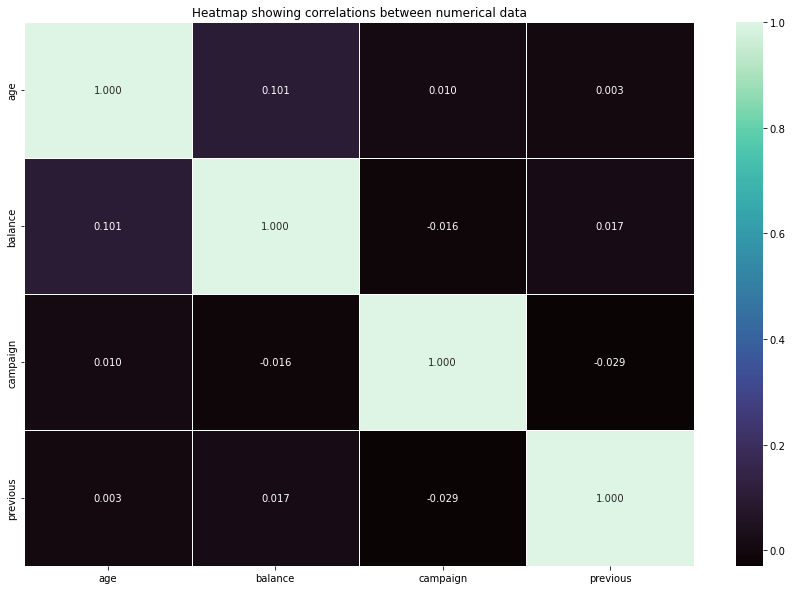

In [17]:
corr = df_full_train[numerical].corr()

plt.figure(figsize=(15,10))  
sns.heatmap(corr, annot=True, cmap='mako', fmt='.3f', linewidths=1, linecolor='White')
plt.title('Heatmap showing correlations between numerical data')
plt.show()

The information obtained from the correlation matrix of the numerical features above is that the `'age'` feature and the `'balance'` feature have a strong correlation in this data compared to the correlation between other features.

### Features Importances using AUC score

In [18]:
auc_feat = []
for col in numerical:
    auc = roc_auc_score(y_train, df_train[col].values).round(3)
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[col].values).round(3)
    
    auc_feat.append(auc)
    print('Features = %10s' %col, '-> AUC = ', auc)

Features =        age -> AUC =  0.514
Features =    balance -> AUC =  0.595
Features =   campaign -> AUC =  0.574
Features =   previous -> AUC =  0.605


From the results of the AUC score for numerical features, I got information that out of the four numerical features, the `'previous'` feature which describes the number of contacts performed before this campaign and for this client is the most important feature.

## OHE with DictVectorizer()
------------

In [19]:
def OHE_DV(df, dv, col):
    dicts = df[col].to_dict(orient='records')
    X_data = dv.fit_transform(dicts)
    
    return X_data
#-------------------------------------------------------#
def OHE_DV_wo_fit(df, dv, col):
    dicts = df[col].to_dict(orient='records')
    X_data = dv.transform(dicts)
    
    return X_data

In [20]:
dv = DictVectorizer(sparse=False)

X_col = categorical+numerical 

X_train = OHE_DV(df_train, dv, X_col)
X_val = OHE_DV_wo_fit(df_val, dv, X_col)

X_train.shape, X_val.shape

((27126, 25), (9042, 25))

## Matrix for XGBoost
--------

In [21]:
features = dv.get_feature_names()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

# Choose Model
----------
For this midterm project there are a few model for classification that I used:
+ `LogisticRegression()`
+ `DecisionTreeClassifier()`
+ `RandomForestClassifier()`
+ `XGBoost()`

## Logistic Regression
--------

In [22]:
scores = []
for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    y_pred_val = model.predict_proba(X_val)[:,1]
    auc_val = roc_auc_score(y_val, y_pred_val).round(3)
    
    y_pred_train = model.predict_proba(X_train)[:,1]
    auc_train = roc_auc_score(y_train, y_pred_train).round(3)
    
    print('C = %5s | AUC-train = %.3f | AUC-val = %.3f' % (C, auc_train, auc_val))

C = 0.001 | AUC-train = 0.655 | AUC-val = 0.659
C =  0.01 | AUC-train = 0.691 | AUC-val = 0.704
C =   0.1 | AUC-train = 0.693 | AUC-val = 0.706
C =     1 | AUC-train = 0.693 | AUC-val = 0.706
C =    10 | AUC-train = 0.693 | AUC-val = 0.706
C =   100 | AUC-train = 0.693 | AUC-val = 0.706


## Decision Tree
-----

In [23]:
for md in [1, 2, 3 ,4, 5, 6, 7, 8, 9, 10]:
    
    dt = DecisionTreeClassifier(max_depth=md)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print('max_dept = %2s | AUC = %.3f' % (md, auc))

max_dept =  1 | AUC = 0.606
max_dept =  2 | AUC = 0.640
max_dept =  3 | AUC = 0.665
max_dept =  4 | AUC = 0.685
max_dept =  5 | AUC = 0.701
max_dept =  6 | AUC = 0.700
max_dept =  7 | AUC = 0.699
max_dept =  8 | AUC = 0.689
max_dept =  9 | AUC = 0.688
max_dept = 10 | AUC = 0.675


In [24]:
scores = []

for depth in [5, 6, 7]:
    for s in [1, 5, 10, 15, 20, 25, 100, 200, 250, 500]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [25]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores_pivot = df_scores.pivot(index='min_samples_leaf', 
                                  columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             5      6      7
min_samples_leaf                     
1                 0.701  0.700  0.699
5                 0.704  0.703  0.704
10                0.708  0.707  0.708
15                0.708  0.708  0.707
20                0.708  0.708  0.709
25                0.708  0.708  0.709
100               0.702  0.705  0.704
200               0.703  0.704  0.707
250               0.703  0.704  0.708
500               0.700  0.707  0.704

## Random Forest
------

In [26]:
scores = []
for r in [1, 3, 5, 10]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, random_state=r, n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
    
        scores.append((n, r, auc))

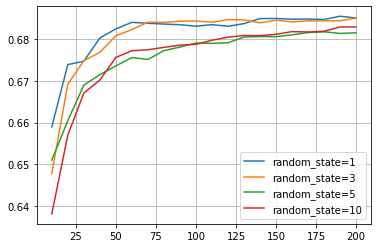

In [27]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'random_state', 'auc'])

for r in [1, 3, 5, 10]:
    df_subset = df_scores[df_scores.random_state == r]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='random_state=%d' % r)

plt.legend()
plt.grid()

In [28]:
r = 1
scores = []

for d in [5, 10, 15, 20]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=r, n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [29]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

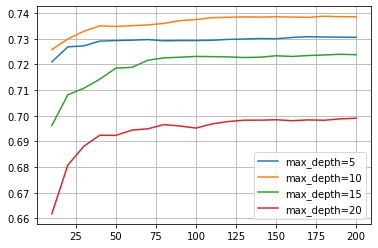

In [30]:
for d in [5, 10, 15, 20]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()
plt.grid()

In [31]:
max_depth = 10
r = 1
scores = []

for s in [1, 3, 5, 10, 50, 100]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=r, n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [32]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

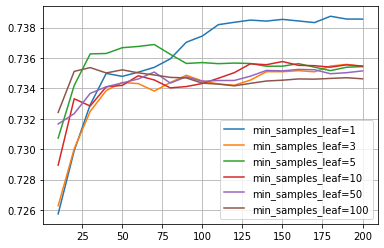

In [33]:
for s in [1, 3, 5, 10, 50, 100]:
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='min_samples_leaf=%d' % s)

plt.legend()
plt.grid()

In [34]:
scores = []
r = 1 
max_depth = 10
s = 1

for f in [1, 3, 5, 10, 20]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    max_features=f,
                                    min_samples_leaf=s,
                                    random_state=1, n_jobs=-1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((f, n, auc))

In [35]:
columns = ['max_features', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

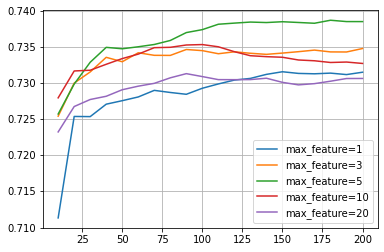

In [36]:
for f in [1, 3, 5, 10, 20]:
    df_subset = df_scores[df_scores.max_features == f]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_feature=%d' % f)

plt.legend()
plt.grid()

## XGBoost
----

In [37]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [38]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [39]:
scores_eta = {}

In [50]:
%%capture output

xgb_params = {
    'eta': 0.5, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

In [51]:
key = 'eta=%s' % (xgb_params['eta'])
scores_eta[key] = parse_xgb_output(output)
scores_eta.keys()

dict_keys(['eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.3', 'eta=0.5'])

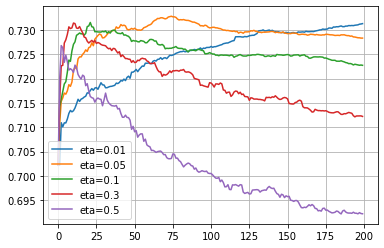

In [52]:
etas = ['eta=0.01', 'eta=0.05', 'eta=0.1', 'eta=0.3', 'eta=0.5']
#etas = ['eta=0.01', 'eta=0.05', 'eta=0.1']

for eta in etas:
    df_score = scores_eta[eta]
    
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)

    plt.grid()
    plt.legend()

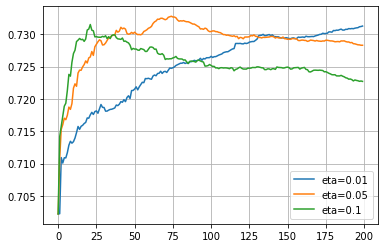

In [53]:
etas = ['eta=0.01', 'eta=0.05', 'eta=0.1']

for eta in etas:
    df_score = scores_eta[eta]
    
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)

    plt.grid()
    plt.legend()

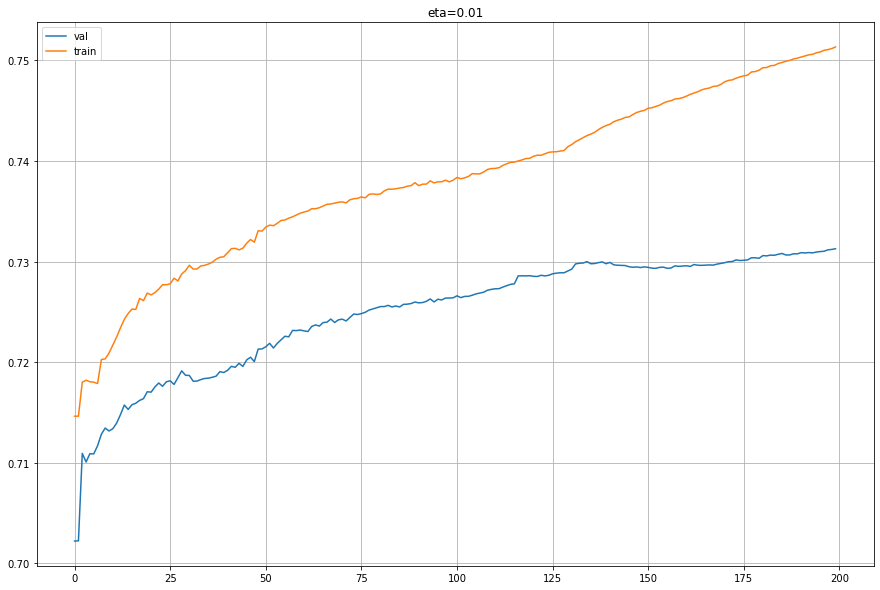

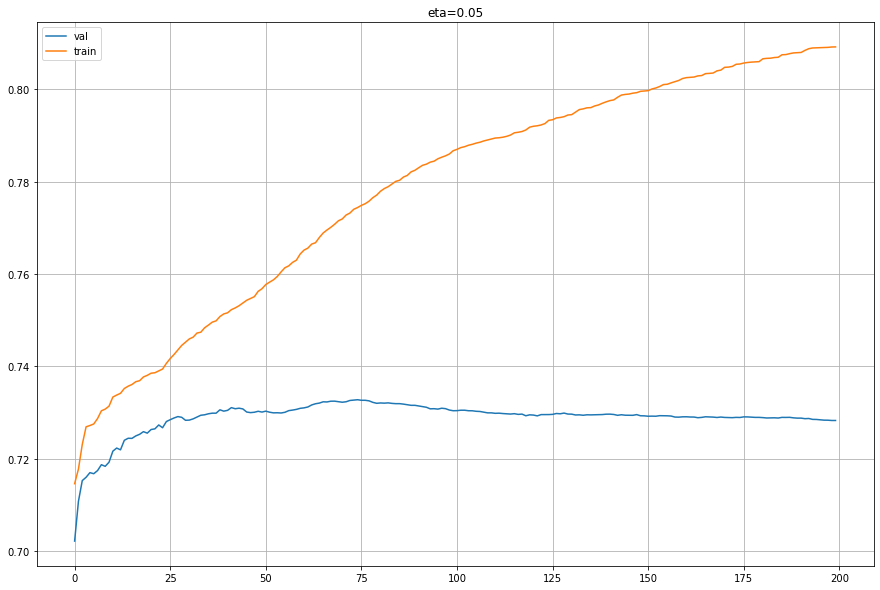

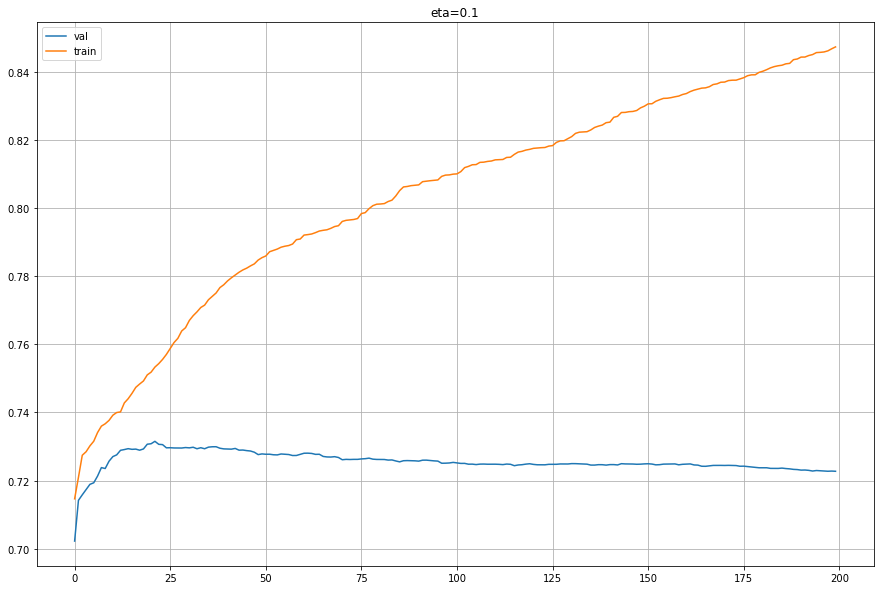

In [55]:
for eta in etas:
    df_score = scores_eta[eta]
    
    plt.figure(figsize=(15, 10))
    plt.title(eta)
    #plt.plot(df_score.num_iter, df_score.val_auc, label=eta)
    plt.plot(df_score.num_iter, df_score.val_auc, label='val')
    plt.plot(df_score.num_iter, df_score.train_auc, label='train')
    plt.grid()
    plt.legend()

In [56]:
scores_md = {}

In [63]:
%%capture output
eta = 0.05

xgb_params = {
    'eta': eta, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

In [64]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores_md[key] = parse_xgb_output(output)
scores_md.keys()

dict_keys(['max_depth=1', 'max_depth=3', 'max_depth=6', 'max_depth=10'])

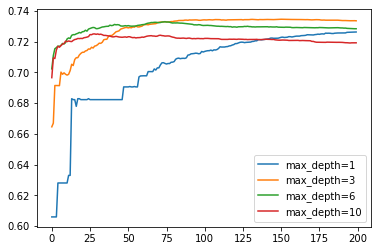

In [65]:
max_dept = ['max_depth=1', 'max_depth=3', 'max_depth=6', 'max_depth=10']

for d in max_dept:
    df_score = scores_md[d]
    
    plt.plot(df_score.num_iter, df_score.val_auc, label=d)
    plt.grid()
    plt.legend()

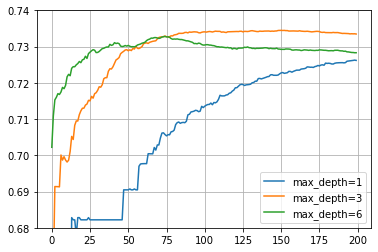

In [66]:
max_dept = ['max_depth=1', 'max_depth=3', 'max_depth=6']

for d in max_dept:
    df_score = scores_md[d]
    
    plt.plot(df_score.num_iter, df_score.val_auc, label=d)
    plt.ylim(0.68, 0.74)
    plt.grid()
    plt.legend()

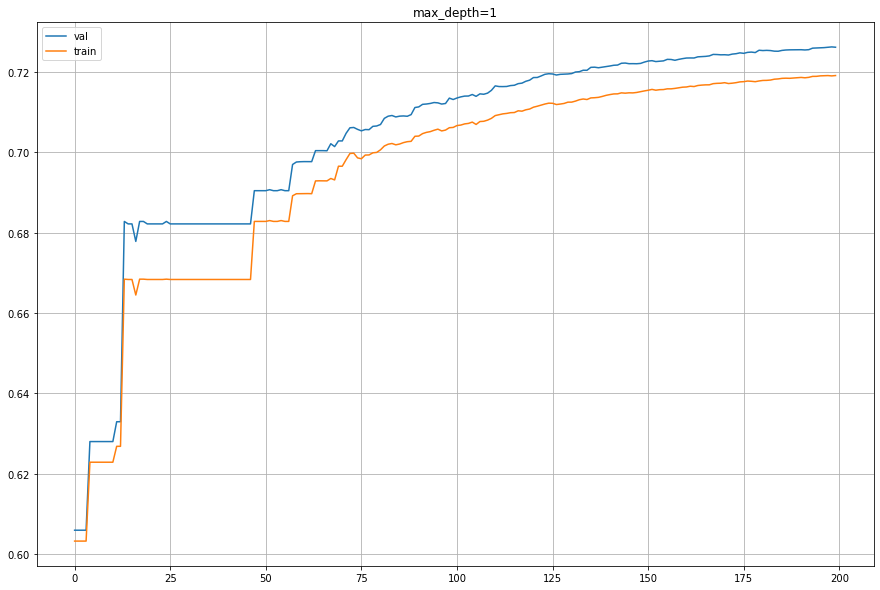

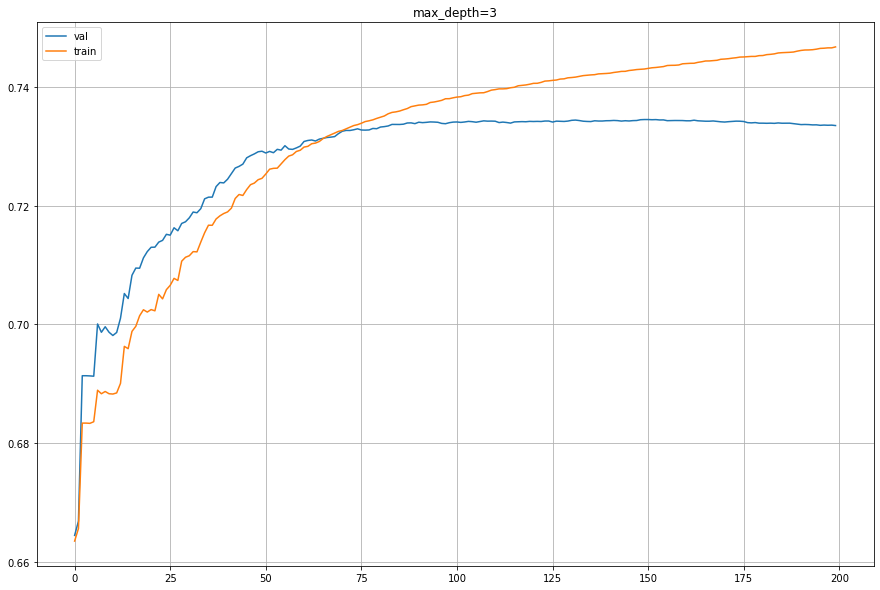

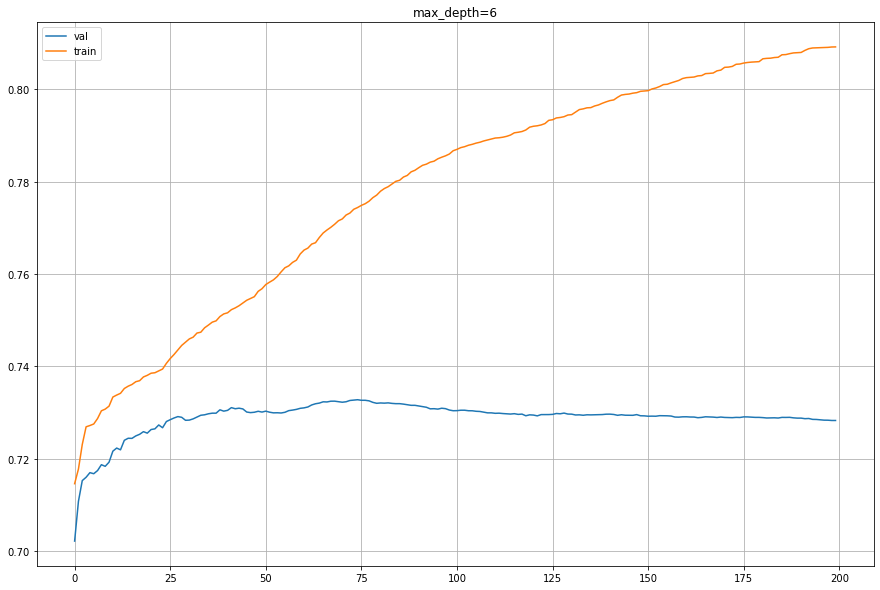

In [68]:
for d in max_dept:
    df_score = scores_md[d]
    
    plt.figure(figsize=(15, 10))
    plt.title(d)
    plt.plot(df_score.num_iter, df_score.val_auc, label='val')
    plt.plot(df_score.num_iter, df_score.train_auc, label='train')
    plt.grid()
    plt.legend()

In [69]:
scores_mcw = {}

In [81]:
%%capture output
eta = 0.05
d = 3

xgb_params = {
    'eta': eta, 
    'max_depth': d,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    }

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

In [82]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores_mcw[key] = parse_xgb_output(output)
scores_mcw.keys()

dict_keys(['min_child_weight=1', 'min_child_weight=5', 'min_child_weight=10', 'min_child_weight=15', 'min_child_weight=20', 'min_child_weight=30'])

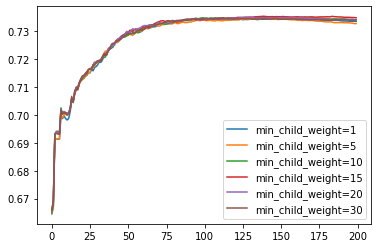

In [86]:
mcw = ['min_child_weight=1', 'min_child_weight=5','min_child_weight=10',
       'min_child_weight=15', 'min_child_weight=20', 'min_child_weight=30']

for w in mcw:
    df_score = scores_mcw[w]
    
    plt.plot(df_score.num_iter, df_score.val_auc, label=w)
    plt.grid()
    plt.legend()    

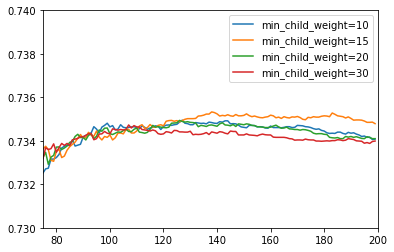

In [87]:
mcw = ['min_child_weight=10', 'min_child_weight=15',
       'min_child_weight=20', 'min_child_weight=30']

for w in mcw:
    df_score = scores_mcw[w]
    
    plt.plot(df_score.num_iter, df_score.val_auc, label=w)
    plt.ylim(0.73, 0.74)
    plt.xlim(75, 200)
    plt.grid()
    plt.legend()    

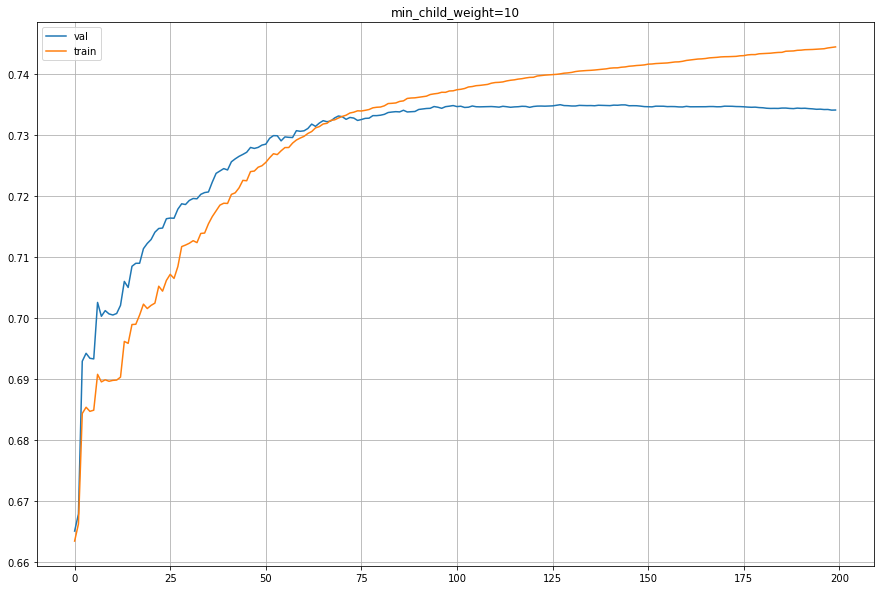

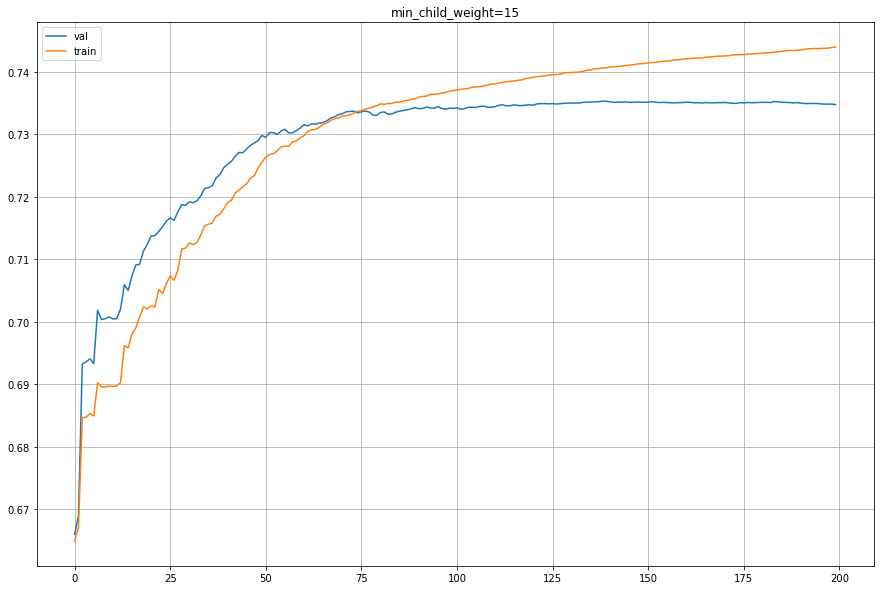

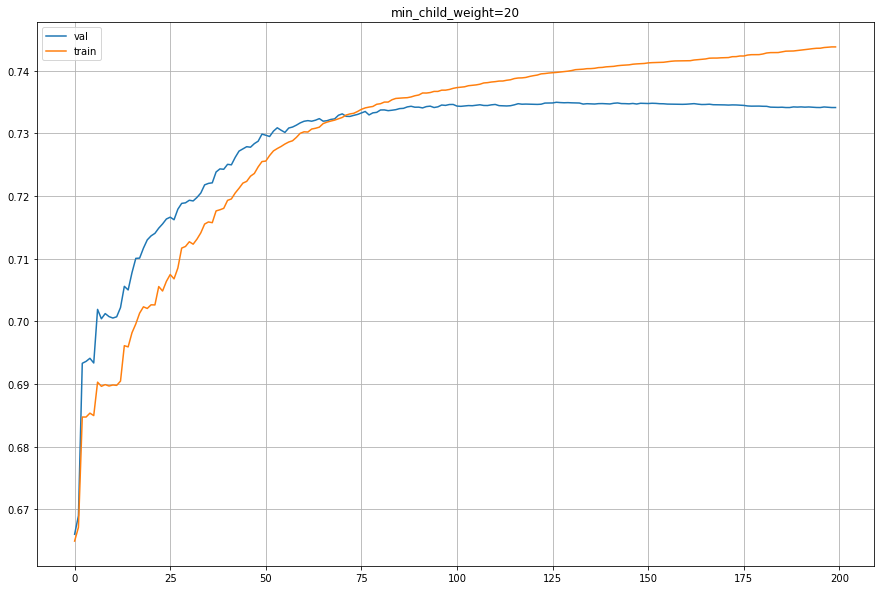

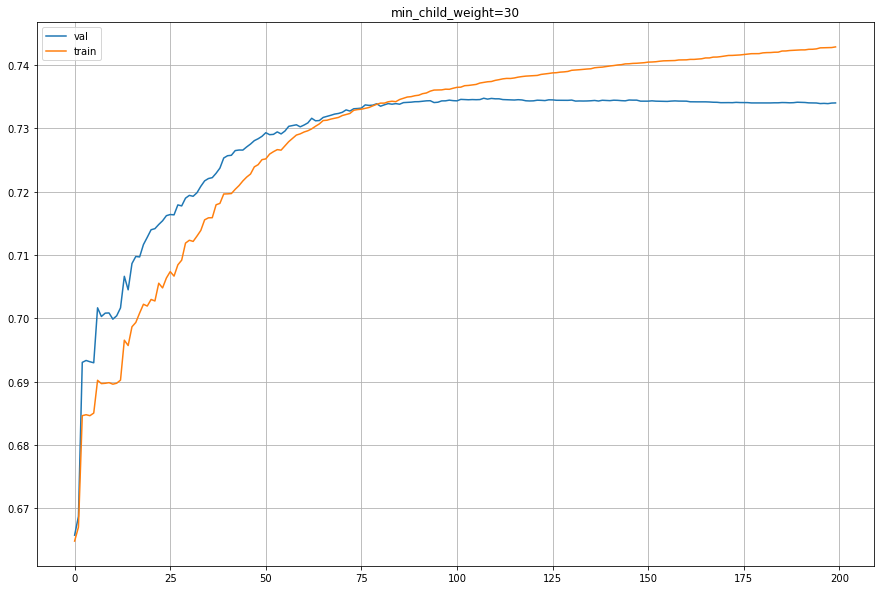

In [89]:
for w in mcw:
    df_score = scores_mcw[w]
    
    plt.figure(figsize=(15, 10))
    plt.title(w)
    plt.plot(df_score.num_iter, df_score.val_auc, label='val')
    plt.plot(df_score.num_iter, df_score.train_auc, label='train')
    plt.grid()
    plt.legend()

## Final Model
----

In [95]:
C = 0.1
model_1 = LogisticRegression(solver='liblinear', C=C, max_iter=1000)

In [96]:
depth = 7
s = 20
model_2 = dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)

In [118]:
r = 1 
max_depth = 10
s = 1
f = 5
n = 180
model_3 = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    max_features=f,
                                    min_samples_leaf=s,
                                    random_state=1, n_jobs=-1)

In [94]:
eta = 0.05
d = 3
w = 15

xgb_params = {
    'eta': eta, 
    'max_depth': d,
    'min_child_weight': w,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
    }

model_4 = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  evals=watchlist)

[0]	train-auc:0.66494	val-auc:0.66603
[1]	train-auc:0.66714	val-auc:0.66899
[2]	train-auc:0.68473	val-auc:0.69330
[3]	train-auc:0.68473	val-auc:0.69361
[4]	train-auc:0.68535	val-auc:0.69410
[5]	train-auc:0.68496	val-auc:0.69335
[6]	train-auc:0.69029	val-auc:0.70190
[7]	train-auc:0.68963	val-auc:0.70040
[8]	train-auc:0.68958	val-auc:0.70051
[9]	train-auc:0.68975	val-auc:0.70084
[10]	train-auc:0.68968	val-auc:0.70049
[11]	train-auc:0.68975	val-auc:0.70053
[12]	train-auc:0.69031	val-auc:0.70206
[13]	train-auc:0.69619	val-auc:0.70595
[14]	train-auc:0.69587	val-auc:0.70505
[15]	train-auc:0.69809	val-auc:0.70740
[16]	train-auc:0.69904	val-auc:0.70912
[17]	train-auc:0.70081	val-auc:0.70923
[18]	train-auc:0.70241	val-auc:0.71132
[19]	train-auc:0.70209	val-auc:0.71240
[20]	train-auc:0.70258	val-auc:0.71376
[21]	train-auc:0.70240	val-auc:0.71383
[22]	train-auc:0.70518	val-auc:0.71448
[23]	train-auc:0.70456	val-auc:0.71526
[24]	train-auc:0.70615	val-auc:0.71613
[25]	train-auc:0.70736	val-auc:0.71

In [119]:
model = [model_1, model_2, model_3, model_4]
name = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
q = 0
auc_score = []
for m in model:
    mod = m
    if mod == model_4:
        y_pred = mod.predict(dval)
        auc = roc_auc_score(y_val, y_pred)
    else:
        mod.fit(X_train, y_train)
        y_pred = mod.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
    
    auc_score.append((name[q], auc.round(3)))    
    q = q+1

In [120]:
columns = ['Model', 'AUC_scores']
df_scores = pd.DataFrame(auc_score, columns=columns)
df_scores

,Model,AUC_scores
0,Logistic Regression,0.706
1,Decision Tree,0.709
2,Random Forest,0.739
3,XGBoost,0.735


## Train Best Model
-------
From all of the model that have been trained, it's shows that `'Random Forest'` model gives the best performances from the AUC scores on validation dataset. Therefore, the final model that I will use in this midterm project is `'Random Forest'` model.

In [113]:
y_full_train = df_full_train.target_cat.values

del df_full_train['target_cat']

In [114]:
dv = DictVectorizer(sparse=False)

X_col = categorical+numerical 

X_full_train = OHE_DV(df_full_train, dv, X_col)
X_test = OHE_DV_wo_fit(df_test, dv, X_col)

X_full_train.shape, X_test.shape

((36168, 25), (9043, 25))

In [121]:
model = model_3

model.fit(X_full_train, y_full_train)
y_pred = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test, y_pred)

print(f'Final Model = {name[2]} -> AUC Score = {auc.round(3)}')

Final Model = Random Forest -> AUC Score = 0.724
